<a href="https://colab.research.google.com/github/aksharakandimalla/dmv-assignment/blob/main/M2_3_6_Univariate_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Univariate Outlier Detection**

In 1980 Dawkins described an outlier as "Observations which deviate so much from other observations as to arouse suspicion that they were generated by a different mechanism". For me this description is to simple and would lead one to conclude that these observations should be excluded or deleted from our data before we complete our analysis. In fact, my view of an outlier is a data point that seems to standout from the rest of the pack. One should not immediately think this is an erronous data point. It could in fact be a quirk of our data. For example maybe after a certain period of time our data was generated from a system that became unstable. While this is a change in process, it tells us that this can happen. Sometimes outliers represent people or subgroups that do strange or alternative things and could potentially tell us where future fashions or trends are going. Maybe they help us identify what is possible? They can be a data miners gold and should not be excluded when identified. When you do identify an outlier you **should have strong evidence** that the data point is erroneous before you delete or exclude it. The rule I use is a data point cannot be excluded unless their is scientific proof that the value you get is not possible. For example if you were measuring heart rates on people and you found one with 1000bpm then this could be excluded from your analysis,as the fastest recorded heart beat is [600bpm](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3273956/). You will note here that I researched the topic and found a paper that basically supported my evidence. The other thing you may say is the data does not follow normal practice and this maybe the case but you can only exlcude the data point if your study is defined to be on normal or regular subjects. Lets look at another example. Imagine you were predicting house prices and most of them ranged between €150k to €1m, but you found one or two at €40m. This is quite possible and these data points cannot be excluded unless you are going to narrow your models to houses under €1m. 

<!--![alt text](https://www.computing.dcu.ie/~amccarren/mcm_images/Outlier_pic1.jpg) -->





Lets look at some data that you can get from sklearn. Its known as the Boston housing data and can be imported using the following code. 

In [ ]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
boston = load_boston()
#print(boston.keys())
print(boston.DESCR)
x = boston.data
y = boston.target
print(pd.Series(y))
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df['Y']=pd.Series(y)
#print(boston_df.columns)
boston_df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The boston variable itself is a dictionary, so we can check for its keys using the print(boston..keys()).

In [ ]:

print(boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']].describe())
print(boston_df[['RM', 'AGE', 'DIS', 'RAD', 'TAX']].describe())
print(boston_df[['PTRATIO', 'B', 'LSTAT','Y']].describe())

             CRIM          ZN       INDUS        CHAS         NOX
count  506.000000  506.000000  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779    0.069170    0.554695
std      8.601545   23.322453    6.860353    0.253994    0.115878
min      0.006320    0.000000    0.460000    0.000000    0.385000
25%      0.082045    0.000000    5.190000    0.000000    0.449000
50%      0.256510    0.000000    9.690000    0.000000    0.538000
75%      3.677083   12.500000   18.100000    0.000000    0.624000
max     88.976200  100.000000   27.740000    1.000000    0.871000
               RM         AGE         DIS         RAD         TAX
count  506.000000  506.000000  506.000000  506.000000  506.000000
mean     6.284634   68.574901    3.795043    9.549407  408.237154
std      0.702617   28.148861    2.105710    8.707259  168.537116
min      3.561000    2.900000    1.129600    1.000000  187.000000
25%      5.885500   45.025000    2.100175    4.000000  279.000000
50%      6

We can look for univariate outliers by using charts such box plot or an individual chart. Examples of both are shown below.

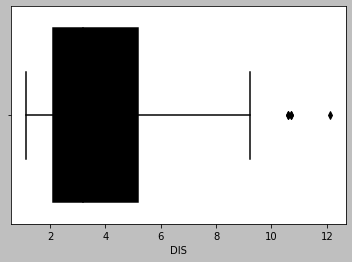

In [ ]:
import seaborn as sns
import numpy as np
sns.boxplot(x=boston_df['DIS'])

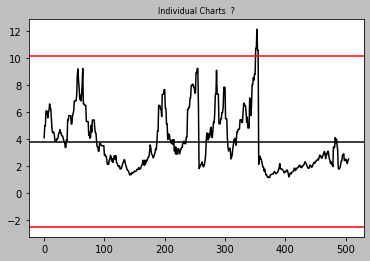

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#x = np.linspace(0, 2*np.pi, 1000)
#y1 = np.sin(x)
x=np.array(boston_df.index.tolist())
y1=np.array(boston_df['DIS'])
f = plt.figure()

ax = f.add_subplot(111)

plt.plot(x, y1)
plt.axhline(y=boston_df['DIS'].mean())
plt.axhline(y=boston_df['DIS'].mean()+3*boston_df['DIS'].std(),color='r')
plt.axhline(y=boston_df['DIS'].mean()-3*boston_df['DIS'].std(),color='r')

plt.title('Individual Charts  ', fontsize=8)




plt.show()

It can often be confusing when attempting to decide how to deal with outliers and there is often as I said before a compulsion to remove them as they don't necessarily fit our orginal hypothesis. 

We have examined the weighted distance variable and we can see at least one outlier. Remember, do not remove outliers unless you have evidence to do so. Repeat this for the remaining variables.  What results do you find? 

